In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-people-personality-types/data.csv


In [2]:
df1= pd.read_csv('/kaggle/input/predict-people-personality-types/data.csv')

In [3]:
df1.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [5]:
df1.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [6]:
round(100*(df1.isnull().sum() /len(df1.index)),4)

Age                   0.0
Gender                0.0
Education             0.0
Introversion Score    0.0
Sensing Score         0.0
Thinking Score        0.0
Judging Score         0.0
Interest              0.0
Personality           0.0
dtype: float64

In [7]:
df1['Personality'].unique()

array(['ENFP', 'ESFP', 'INTP', 'INFP', 'ENFJ', 'ENTP', 'ESTP', 'ISTP',
       'INTJ', 'INFJ', 'ISFP', 'ENTJ', 'ESFJ', 'ISFJ', 'ISTJ', 'ESTJ'],
      dtype=object)

In [8]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df1['Interest'].unique()

array(['Unknown', 'Sports', 'Others', 'Technology', 'Arts'], dtype=object)

In [10]:
df1['Gender']= df1['Gender'].map({'Male':0,'Female':1})

In [11]:
interest= pd.get_dummies(df1['Interest'], prefix='Interest').astype(int)
interest.drop(['Interest_Unknown'], axis=1)
df1= pd.concat([df1,interest], axis=1)

In [12]:
df1= df1.drop(['Interest'], axis=1)

In [13]:
df1.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,0,0,9.47080,7.141434,6.03696,4.360278,ENFP,0,0,0,0,1
1,27.0,1,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,0,1,0,0
2,21.0,1,0,7.08615,3.388433,2.66188,5.127320,ENFP,0,0,0,0,1
3,28.0,0,0,2.01892,4.823624,7.30625,5.986550,INTP,0,1,0,0,0
4,36.0,1,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,0,0,1,0


In [14]:
df1['Personality']= df1['Personality'].map({'ENFP':0,'ENTP':1, 'INFP':2,'INTP':3,'ESFP':4,'ENFJ':5, 'ISFP':6,'ESTP':7,'INFJ':8,'ENTJ':9,'ISTP':10,'INTJ':11, 'ESFJ':12,'ESTJ':13, 'ISFJ':14,'ISTJ':15 })

In [15]:
df1_cont=df1[['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score','Judging Score']]

In [16]:
normalized_df1= (df1_cont-df1_cont.mean())/df1_cont.std()

In [17]:
df1= df1.drop(['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score','Judging Score'], axis=1)

In [18]:
df1=pd.concat([df1,normalized_df1],axis=1)

In [19]:
df1.head()

,Gender,Education,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown,Age,Introversion Score,Sensing Score,Thinking Score,Judging Score
0,0,0,0,0,0,0,0,1,-1.497363,1.548971,1.740600,0.363449,-0.156667
1,1,0,4,0,0,1,0,0,0.132621,0.296864,0.911316,-1.449235,-0.256450
2,1,0,0,0,0,0,0,1,-1.089867,0.723443,-1.431210,-0.806010,0.394534
3,0,0,3,0,1,0,0,0,0.336369,-1.030752,-0.218273,0.803255,1.011983
4,1,1,0,0,0,0,1,0,1.966354,1.703449,-0.276202,0.113184,0.071085


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: >

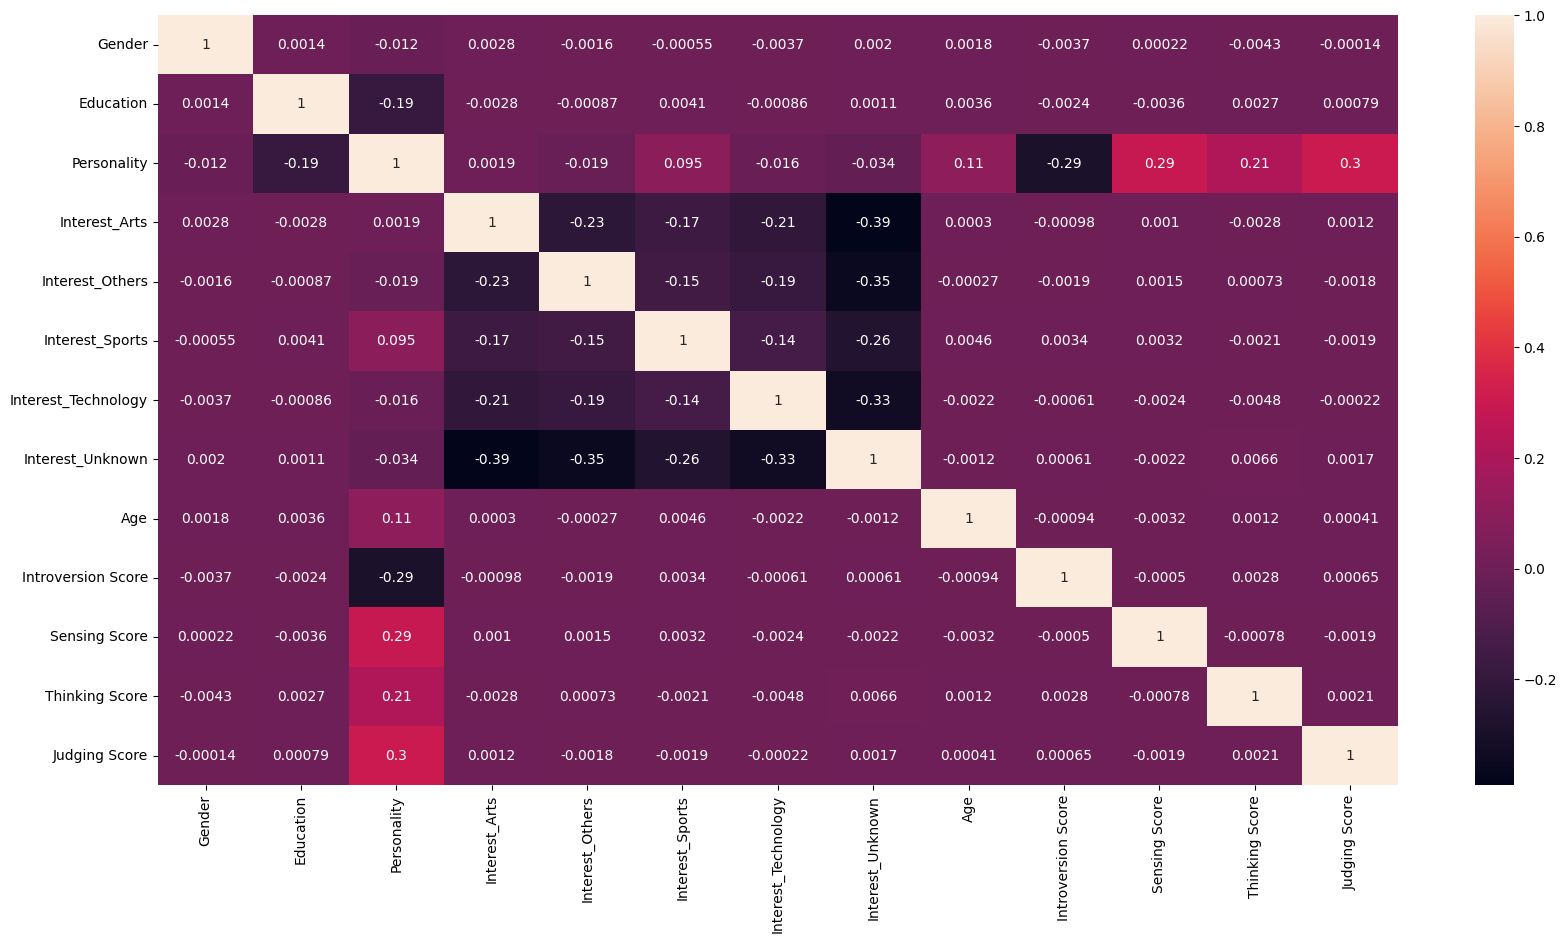

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Personality'}>,
        <Axes: title={'center': 'Interest_Arts'}>],
       [<Axes: title={'center': 'Interest_Others'}>,
        <Axes: title={'center': 'Interest_Sports'}>,
        <Axes: title={'center': 'Interest_Technology'}>,
        <Axes: title={'center': 'Interest_Unknown'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Introversion Score'}>,
        <Axes: title={'center': 'Sensing Score'}>,
        <Axes: title={'center': 'Thinking Score'}>],
       [<Axes: title={'center': 'Judging Score'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

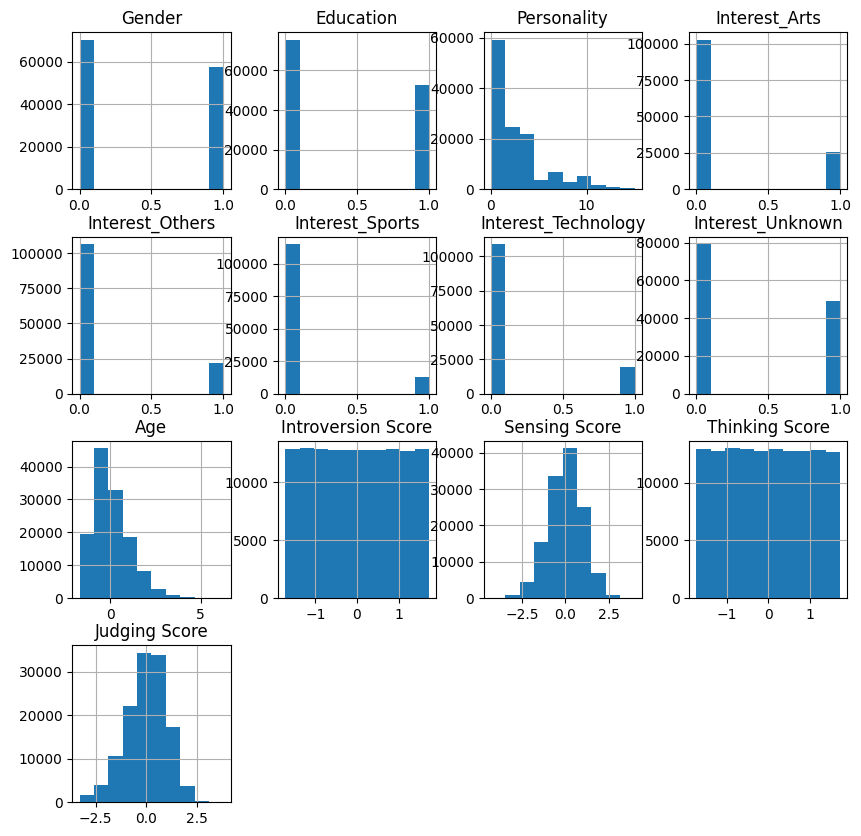

In [22]:
df1.hist(figsize=(10,10))

In [23]:
df1.columns

Index(['Gender', 'Education', 'Personality', 'Interest_Arts',
       'Interest_Others', 'Interest_Sports', 'Interest_Technology',
       'Interest_Unknown', 'Age', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score'],
      dtype='object')

In [24]:
X= df1[['Gender', 'Education', 'Interest_Arts',
       'Interest_Others', 'Interest_Sports', 'Interest_Technology',
       'Interest_Unknown', 'Age', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score']]

In [25]:
y=df1['Personality']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7 , random_state=101)

In [28]:
import statsmodels.api as sm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(y_pred)

[0 0 9 ... 2 0 6]


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_pred, y_test)

In [35]:
print(accuracy)

0.8761550274603712


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=15, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 2 9 ... 2 0 6]


In [37]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.906530622868893
